

# **Crop yield Prediction model built by Oluyemi Isaiah(Ziyah)**


##Project Overview
This machine learning project centers on predicting crop yields, a pivotal aspect of agriculture with direct implications for food production and resource planning. The project aims to harness historical crop yield data and relevant features to build a machine learning model capable of accurately forecasting future crop yields. Factors such as weather conditions, soil quality, and farming practices play a crucial role in influencing crop yields, making it imperative to develop a robust predictive model.

### **Objective**
The primary objective is to develop a resilient machine learning model that can accurately predict crop yields based on historical trends and key influencing factors. The project aims to achieve this by analyzing historical crop yield data and incorporating pertinent features, including weather patterns, soil quality, and farming practices. The ultimate goal is to provide a tool that supports decision-making in the agricultural sector.

##  **Brief explanation of each column:**
Fertilizer : Representing the quantity or concentration of fertilizer applied in some units

Temperature: Temperature conditions during the farming period.

Nitrogen (N): Amount of nitrogen present in the fertilizer or soil, typically measured in pounds per acre.

Phosphorus (P): Amount of phosphorus present in the fertilizer or soil, typically measured in pounds per acre.

Potassium (K): Amount of potassium present in the fertilizer or soil, typically measured in pounds per acre.

Yield (Q/acre): The quantity of crop harvested per acre, typically measured in bushels, tons, or other appropriate units.

### **Steps to be Taken**
1. **Data gathering and exploration**

Acquire historical crop yield data from reliable sources, such as agricultural databases, government publications, or online repositories. in my case my dataset was sourced from Kaggle. They are world's largest data science community with powerful tools and resources. Before i go into details, i will be importing the libraries that i will be using for the projects.



### Importing the libraries for the project.
  

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import joblib
import warnings
warnings.filterwarnings('ignore')

### load data and perform neccessary preprocessing tasks.


In [15]:
data= pd.read_excel('crop yield data sheet.xlsx')
data



,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0
...,...,...,...,...,...,...,...
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data.describe()

,Rain Fall (mm),Fertilizer,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,849.797980,67.808081,70.737374,21.131313,18.060606,9.050505
std,400.042676,10.028202,6.677079,1.951695,1.817254,1.965902
min,400.000000,50.000000,59.000000,18.000000,15.000000,5.500000
25%,450.000000,60.000000,65.000000,19.500000,16.000000,7.000000
50%,1150.000000,70.000000,71.000000,21.000000,19.000000,9.000000
75%,1237.500000,77.000000,77.000000,23.000000,19.000000,11.000000
max,1300.000000,80.000000,80.000000,25.000000,22.000000,12.000000


In [17]:
data.info()# This reveals that all the columns are floats data-types except for
#Temperature which is in objects which shows the inconsistency.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperatue      100 non-null    object 
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yeild (Q/acre)  99 non-null     float64
dtypes: float64(6), object(1)
memory usage: 6.1+ KB


In [18]:
data['Temperatue'] = pd.to_numeric(data['Temperatue'], errors = 'coerce') #----converting the column temperature to float.
data.dtypes

Rain Fall (mm)    float64
Fertilizer        float64
Temperatue        float64
Nitrogen (N)      float64
Phosphorus (P)    float64
Potassium (K)     float64
Yeild (Q/acre)    float64
dtype: object

In [19]:
data.isnull().sum()# This shows the number of missing values in each of the columns.

Rain Fall (mm)    10
Fertilizer        10
Temperatue        10
Nitrogen (N)      10
Phosphorus (P)    10
Potassium (K)     10
Yeild (Q/acre)    10
dtype: int64

In [20]:
# Check for duplicate rows in the entire DataFrame
duplicate_rows = data.duplicated().sum()
print(f'Duplicate rows: {duplicate_rows}')


Duplicate rows: 13


In [21]:

# Turning the columns to numerical variables
num = data.select_dtypes(include = 'number')

print(f'Numerical Variables')
display(num.head())


Numerical Variables


,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28.0,80.0,24.0,20.0,12.0
1,480.0,60.0,36.0,70.0,20.0,18.0,8.0
2,1250.0,75.0,29.0,78.0,22.0,19.0,11.0
3,450.0,65.0,35.0,70.0,19.0,18.0,9.0
4,1200.0,80.0,27.0,79.0,22.0,19.0,11.0


In [22]:
#Cleaning the missing values

for i in num.columns:
    if i in data.columns:
        data[i].fillna(data[i].median(), inplace = True)

data.isnull().sum()

Rain Fall (mm)    0
Fertilizer        0
Temperatue        0
Nitrogen (N)      0
Phosphorus (P)    0
Potassium (K)     0
Yeild (Q/acre)    0
dtype: int64

In [39]:
 #Renaming the columns for easy identification
data.rename(columns = {'Yeild (Q/acre)': 'Yield', 'Rain Fall (mm)': 'RainFall', 'Nitrogen (N)' : 'Nitrogen', 'Phosphorus (P)' : 'Phosphorus', 'Potassium (K)' : 'Potassium', 'Temperatue' :'Temperature'}, inplace = True)

In [40]:
data

,RainFall,Fertilizer,Temperature,Nitrogen,Phosphorus,Potassium,Yield
0,1230.0,80.0,28.0,80.0,24.0,20.0,12.0
1,480.0,60.0,36.0,70.0,20.0,18.0,8.0
2,1250.0,75.0,29.0,78.0,22.0,19.0,11.0
3,450.0,65.0,35.0,70.0,19.0,18.0,9.0
4,1200.0,80.0,27.0,79.0,22.0,19.0,11.0
...,...,...,...,...,...,...,...
104,1150.0,70.0,29.0,71.0,21.0,19.0,9.0
105,1150.0,70.0,29.0,71.0,21.0,19.0,9.0
106,1150.0,70.0,29.0,71.0,21.0,19.0,9.0
107,1150.0,70.0,29.0,71.0,21.0,19.0,9.0


## **Data Visualisation**

### **Checking for the correlations between Y which is the yield and X which are Rain Fall (mm),Fertilizer,Temperatue,	Nitrogen (N), Phosphorus (P), Potassium (K).**

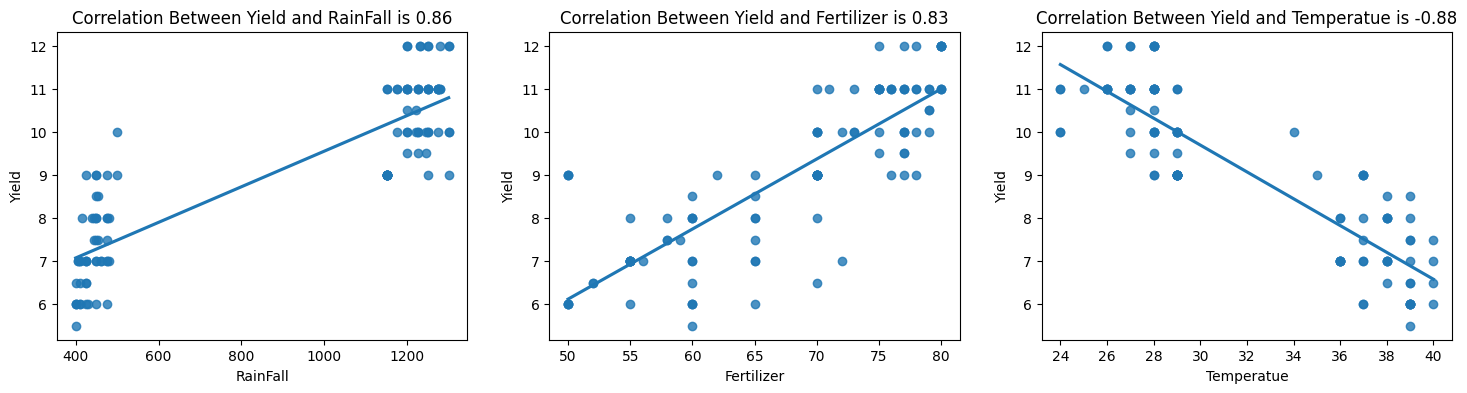

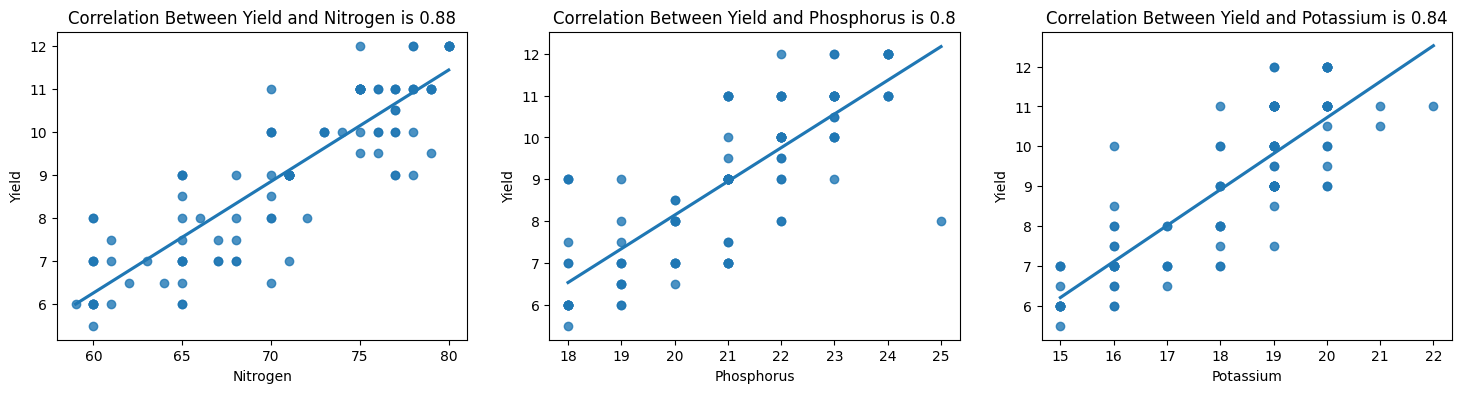

In [25]:
num_data = data.select_dtypes(include = 'number')

def plotter(data, a, b, c, dependent):
    plt.figure(figsize = (18, 4))

    plt.subplot(1, 3, 1)
    sns.regplot(y = data[dependent], x = data[a], ci = 0)
    plt.title(f"Correlation Between Yield and {a} is {(data[dependent].corr(data[a]).round(2))}")

    plt.subplot(1, 3, 2)
    sns.regplot(y = data[dependent], x = data[b], ci = 0)
    plt.title(f"Correlation Between Yield and {b} is {(data[dependent].corr(data[b]).round(2))}")

    plt.subplot(1, 3, 3)
    sns.regplot(y = data[dependent], x = data[c], ci = 0)
    plt.title(f"Correlation Between Yield and {c} is {(data[dependent].corr(data[c]).round(2))}")

plotter(data, 'RainFall', 'Fertilizer','Temperatue', 'Yield')

plotter(data, 'Nitrogen', 'Phosphorus', 'Potassium', 'Yield')

<Axes: >

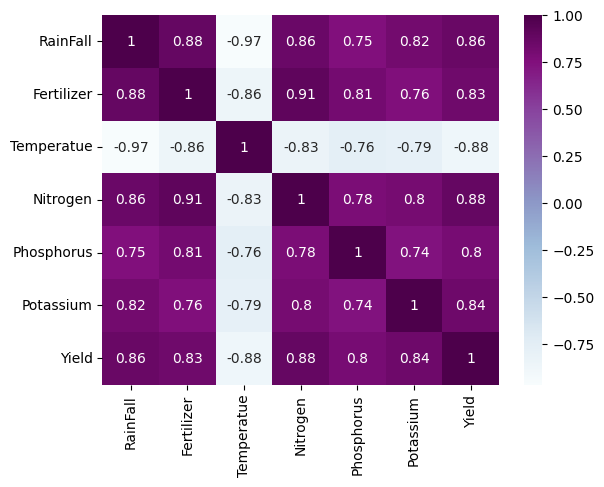

In [26]:
# MULTI- COLINEARITY
sns.heatmap(data.corr(), annot = True, cmap = 'BuPu')

## Checking for **outliers**

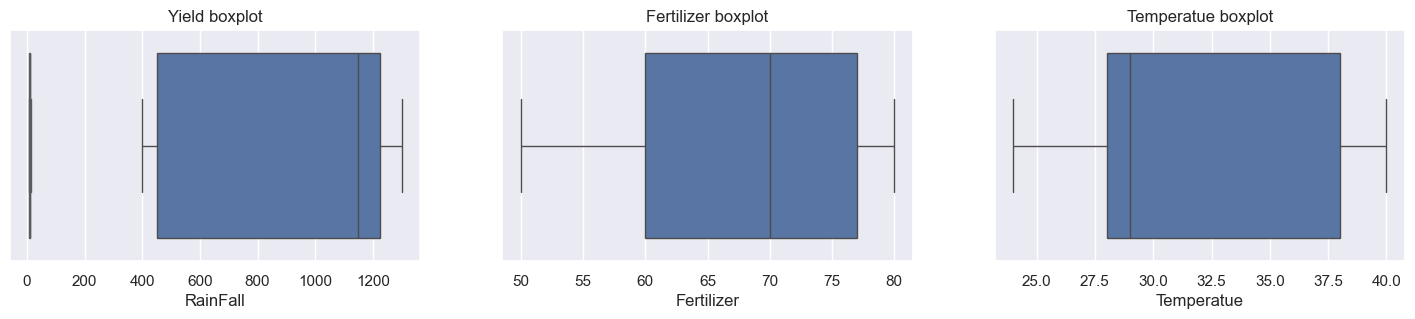

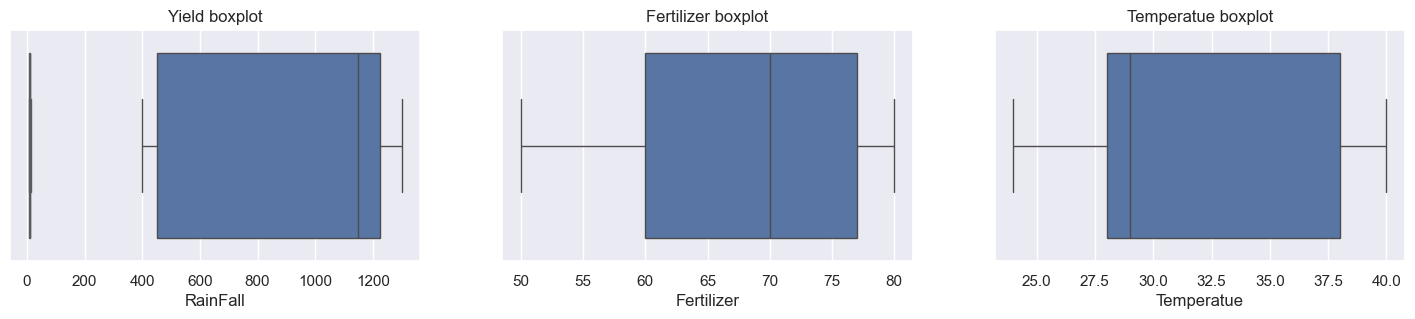

In [27]:
def outlierChecker(data, a,b,c,d):
    plt.figure(figsize = (18, 3))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 3, 1)
    sns.boxplot(x = data[a])
    plt.title(f"{a} boxplot")

    plt.subplot(1, 3, 2)
    sns.boxplot(x = data[b])
    plt.title(f"{b} boxplot")

    plt.subplot(1, 3, 3)
    sns.boxplot(x = data[c])
    plt.title(f"{c} boxplot")

    plt.subplot(1, 3, 1)
    sns.boxplot(x = data[d])
    plt.title(f"{d} boxplot")



outlierChecker(data, 'RainFall', 'Fertilizer','Temperatue', 'Yield')

outlierChecker(data, 'RainFall', 'Fertilizer','Temperatue', 'Yield')


# **Model Training**
A machine learning training model is a process in which a machine learning (ML) algorithm is fed with sufficient training data to learn from.There are several types of machine learning models, of which the most common ones are supervised and unsupervised learning.Supervised learning is possible when the training data contains both the input and output values. Each set of data that has the inputs and the expected output is called a supervisory signal. The training is done based on the deviation of the processed result from the documented result when the inputs are fed into the model.

Unsupervised learning involves determining patterns in the data. Additional data is then used to fit patterns or clusters. This is also an iterative process that improves the accuracy based on the correlation to the expected patterns or clusters. There is no reference output dataset in this method.
 For the sake of this project i will be using a type of supervised learning called Linear regression.
 Regression is a supervised learning technique used to predict continuous numerical values based on input features. It aims to establish a functional relationship between independent variables and a dependent variable.
 The goal is to minimize the difference between predicted and actual values using algorithms like Linear Regression, Decision Trees, or Neural Networks, ensuring the model captures underlying patterns in the data.

### **Seperating the dataset to train and test importing the algorithm to be used.**

In [41]:

x = data.drop('Yield', axis = 1)
y = data.Yield

xtrain, xtest, ytrain,ytest = train_test_split(x, y, test_size = 0.20, random_state = 10)
print(f'Xtrain: {xtrain.shape}')
print(f'ytrain: {ytrain.shape}')
print(f'Xtest: {xtest.shape}')
print(f'ytest: {ytest.shape}')


Xtrain: (87, 6)
ytrain: (87,)
Xtest: (22, 6)
ytest: (22,)


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

regressor = LinearRegression() # ---------------------------------------- instantiate the algorithm
regressor.fit(xtrain, ytrain) # ----------------------------------------- Fit the algorithm on the model

# checking for underfitting
cross_validation = regressor.predict(xtrain)
print(f'Cross Validation Score: {r2_score(cross_validation, ytrain)}')

Cross Validation Score: 0.8469273209543173


In [30]:
#Cross Validation Score: 0.8469273209543173--- with this results it has revealed that the model is able to predict
#accurately with the train dataset.

In [43]:
test = regressor.predict(xtest)
print(f'Test Score: {r2_score(test, ytest)}')

Test Score: 0.8945611251217582


In [32]:
#Test Score: 0.8945611251217582 --- Test score shows that the model will be able to perform better with a new dataset.

In [44]:
data

,RainFall,Fertilizer,Temperature,Nitrogen,Phosphorus,Potassium,Yield
0,1230.0,80.0,28.0,80.0,24.0,20.0,12.0
1,480.0,60.0,36.0,70.0,20.0,18.0,8.0
2,1250.0,75.0,29.0,78.0,22.0,19.0,11.0
3,450.0,65.0,35.0,70.0,19.0,18.0,9.0
4,1200.0,80.0,27.0,79.0,22.0,19.0,11.0
...,...,...,...,...,...,...,...
104,1150.0,70.0,29.0,71.0,21.0,19.0,9.0
105,1150.0,70.0,29.0,71.0,21.0,19.0,9.0
106,1150.0,70.0,29.0,71.0,21.0,19.0,9.0
107,1150.0,70.0,29.0,71.0,21.0,19.0,9.0


In [45]:
output = pd.concat([xtest.reset_index(drop = True), ytest.reset_index(drop = True)], axis = 1)
output['Predicted'] =  pd.Series(test)
output

,RainFall,Fertilizer,Temperature,Nitrogen,Phosphorus,Potassium,Yield,Predicted
0,1250.0,77.0,28.0,76.0,22.0,19.0,10.0,10.154463
1,450.0,56.0,40.0,67.0,18.0,15.0,7.0,6.382524
2,1150.0,70.0,29.0,71.0,21.0,19.0,9.0,9.544429
3,1275.0,77.0,27.0,78.0,21.0,20.0,11.0,10.703564
4,400.0,60.0,39.0,60.0,18.0,15.0,6.0,5.709109
5,1150.0,70.0,29.0,71.0,21.0,19.0,9.0,9.544429
6,425.0,60.0,39.0,60.0,18.0,15.0,6.0,5.681696
7,450.0,65.0,39.0,70.0,20.0,19.0,8.5,8.269214
8,1200.0,78.0,27.0,78.0,23.0,19.0,12.0,10.764958
9,445.0,60.0,38.0,68.0,22.0,18.0,8.0,8.395329


In [46]:

joblib.dump(regressor, open('CropPrediction.pkl', 'wb'))

In [48]:
data['Temperature'].dtypes

dtype('float64')